# Classifying movie reviews: a binary classification example

# Loading the IMDB dataset

In [1]:
import tensorflow

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [3]:
 train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

# Preparing the data

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Configuring the optimizer

In [10]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

# Validating your approach


In [11]:
x_val = x_train[:10000] #10000 data
partial_x_train = x_train[10000:] #15000remaining data 
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Training your model

In [12]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 38s 3ms/sample - loss: 0.5182 - accuracy: 0.7841 - val_loss: 0.3865 - val_accuracy: 0.8740
Epoch 2/20
15000/15000 [==============================] - 18s 1ms/sample - loss: 0.3110 - accuracy: 0.9016 - val_loss: 0.3079 - val_accuracy: 0.8907
Epoch 3/20
15000/15000 [==============================] - 3s 200us/sample - loss: 0.2259 - accuracy: 0.9277 - val_loss: 0.2900 - val_accuracy: 0.8857
Epoch 4/20
15000/15000 [==============================] - 3s 178us/sample - loss: 0.1791 - accuracy: 0.9426 - val_loss: 0.2947 - val_accuracy: 0.8807
Epoch 5/20
15000/15000 [==============================] - 2s 164us/sample - loss: 0.1426 - accuracy: 0.9559 - val_loss: 0.2834 - val_accuracy: 0.8897
Epoch 6/20
15000/15000 [==============================] - 2s 157us/sample - loss: 0.1192 - accuracy: 0.9642 - val_loss: 0.2924 - val_accuracy: 0.8852
Epoch 7/20
15000/15000 [============================

In [13]:
historyDic=history.history
historyDic.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plotting the training and validation loss

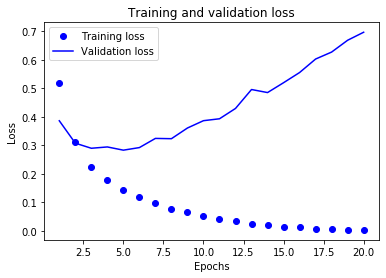

In [21]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation accuracy

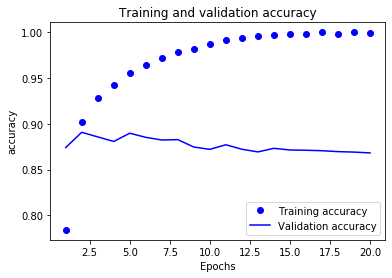

In [15]:
plt.clf()
accuracy_values = historyDic['accuracy']
val_accuracy_values = historyDic['val_accuracy']
plt.plot(epochs,accuracy_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Retraining a model from scratch

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 19s 760us/sample - loss: 0.4819 - accuracy: 0.8167
Epoch 2/4
25000/25000 [==============================] - 3s 118us/sample - loss: 0.2731 - accuracy: 0.9081
Epoch 3/4
25000/25000 [==============================] - 2s 95us/sample - loss: 0.2073 - accuracy: 0.9258
Epoch 4/4
25000/25000 [==============================] - 3s 105us/sample - loss: 0.1716 - accuracy: 0.9394
25000/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [17]:
results = model.evaluate(x_test, y_test)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [18]:
result=model.predict(x_test)
result

array([[0.29804134],
       [0.99995136],
       [0.96766615],
       ...,
       [0.20405018],
       [0.13883144],
       [0.7475605 ]], dtype=float32)